In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
importan_columns = [
 'mail', 
 'number_of_tasks_completed',
 'number_of_sentences', 
 'MezunlukDurumu',	
 'AdSoyad',	
 'TelefonNo',	
 'Yaş',	
 'Üniversite',	
 'Bölüm',	
 'Sınıf',	
 'Transkript',	
 'Matematik1',	
 'Matematik2',	
 'Fizik1',	
 'Fizik2',	
 'İngilizceSeviye',	
 'TOEFL/IELTS', 
 'ÇalışılanKurum',	
 'BaşvuruKaynağı',	
 'CV',  
 'cumulative_english_term_detection_tp',	
 'cumulative_english_term_detection_fp',	
 'cumulative_english_term_detection_fn',	
 'cumulative_english_term_detection_tn',	
 'cumulative_english_term_detection_precision',	
 'cumulative_english_term_detection_recall',	
 'cumulative_english_term_detection_f1_score',	
 'cumulative_english_term_detection_accuracy',	
 'cumulative_turkish_term_detection_tp',	
 'cumulative_turkish_term_detection_fp',	
 'cumulative_turkish_term_detection_fn',	
 'cumulative_turkish_term_detection_tn',	
 'cumulative_turkish_term_detection_precision',	
 'cumulative_turkish_term_detection_recall',	
 'cumulative_turkish_term_detection_f1_score',	
 'cumulative_turkish_term_detection_accuracy',	
 'cumulative_turkish_labels_intersection_num',	
 'cumulative_turkish_labels_difference_num',	
 'cumulative_turkish_labels_exact_match',	
 'cumulative_turkish_corrections_intersection_num',	
 'cumulative_turkish_corrections_difference_num',	
 'cumulative_turkish_corrections_exact_match',	
 'cumulative_english_term_linking_intersection_num',	
 'cumulative_english_term_linking_difference_num',	
 'cumulative_english_term_linking_exact_match'
]

In [496]:
# save the dataframes to excel
df = pd.read_excel('1_merged_based_on_old.xlsx')

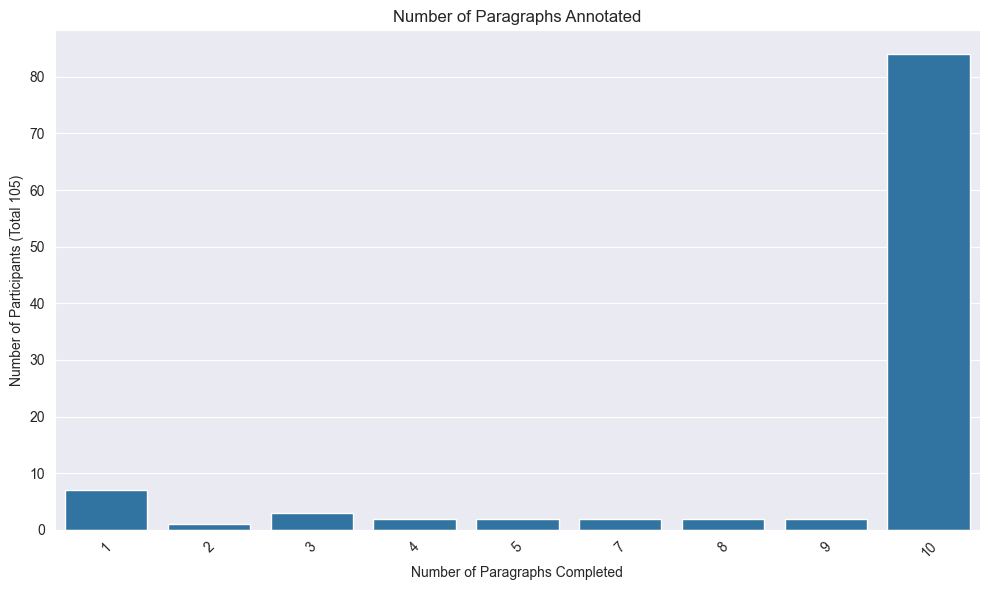

<Figure size 640x480 with 0 Axes>

In [497]:
plt.figure(figsize=(10, 6))
sns.countplot(x='number_of_tasks_completed', data=df)
plt.title('Number of Paragraphs Completed')
plt.xlabel('Number of Paragraphs Completed')
plt.ylabel('Number of Participants (Total 105)')
# add total number of participants on the title
plt.title('Number of Paragraphs Annotated'.format(len(df)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# save the plot
plt.savefig('number_of_tasks_completed.png')

In [498]:
#

In [499]:
annotators = df[(df['number_of_tasks_completed'] > 8)]

# get mail of smallest precision
sorted_annotators = annotators.sort_values(by='cumulative_english_term_detection_f1_score', ascending=True)


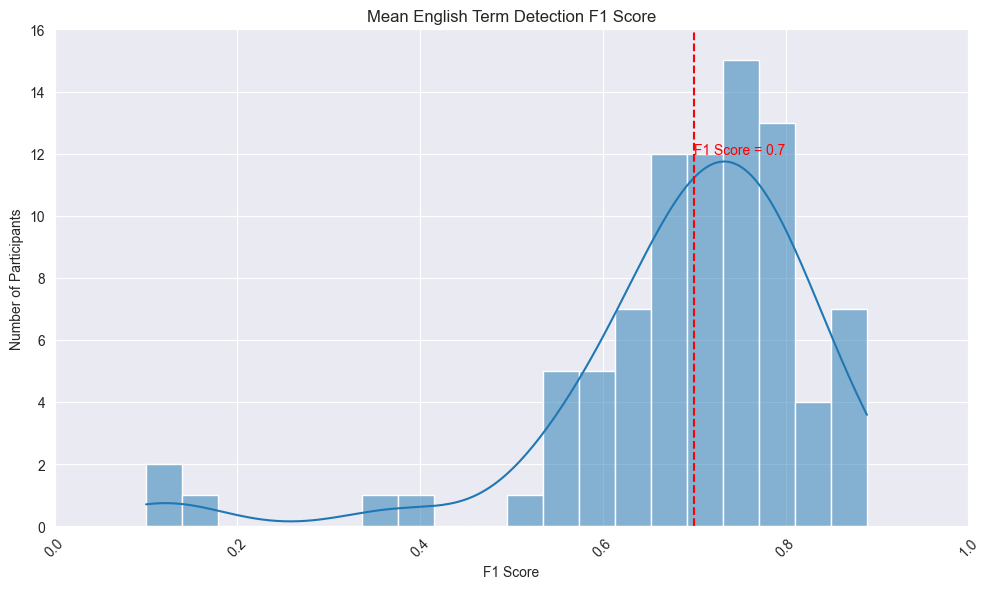

Number of Participants:  86
Number of Participants with F1 Score More Than 0.7:  49


0.7770751192973424

In [500]:
# plot cumulative_english_term_detection_f1_score as histogram
plt.figure(figsize=(10, 6))
sorted_annotators['cumulative_english_term_detection_f1_score'] = sorted_annotators['cumulative_english_term_detection_f1_score'] + 0.10
sns.histplot(sorted_annotators['cumulative_english_term_detection_f1_score'], bins=20, kde=True)


# make x-max 1.0 
plt.xlim(0, 1.0)
plt.ylim(0, 16)


plt.title('Mean English Term Detection F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)

# make vertical red line x = 0.7
plt.axvline(x=0.7, color='red', linestyle='--')
# add text to the plot
plt.text(0.7, 12, 'F1 Score = 0.7', rotation=0, color='red')




plt.tight_layout()
plt.show()



print('Number of Participants: ', len(annotators))

# get number of sentences if the f1 score is more than 0.6
a = sorted_annotators[sorted_annotators['cumulative_english_term_detection_f1_score'] > 0.70]

# ad 0.1 to each f1 score to make it more readable

print('Number of Participants with F1 Score More Than 0.7: ', len(a))

a['cumulative_english_term_detection_f1_score'].mean()


In [501]:
sorted_annotators['cumulative_english_term_detection_f1_score'].mean()

0.6902072410692012

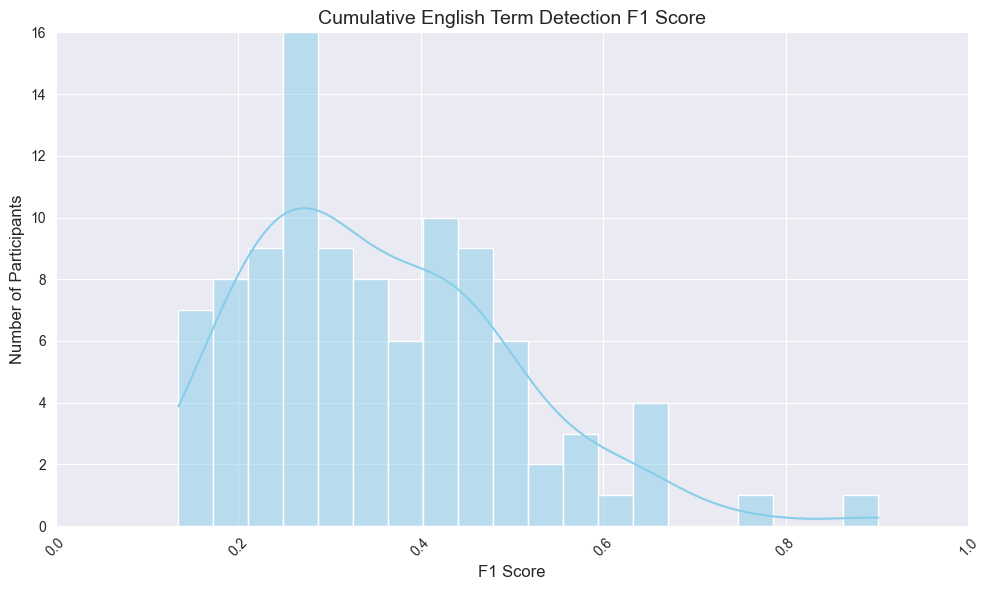

In [502]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for cumulative_english_term_detection_f1_score
np.random.seed(42)  # For reproducibility
f1_scores = np.random.beta(2, 5, 100)  # Generating some random beta-distributed F1 scores

# Plot cumulative_english_term_detection_f1_score as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(f1_scores + 0.1, bins=20, color='skyblue', kde=True)

# Set x and y limits
plt.xlim(0, 1.0)
plt.ylim(0, 16)

# Add title and labels
plt.title('Cumulative English Term Detection F1 Score', fontsize=14)
plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


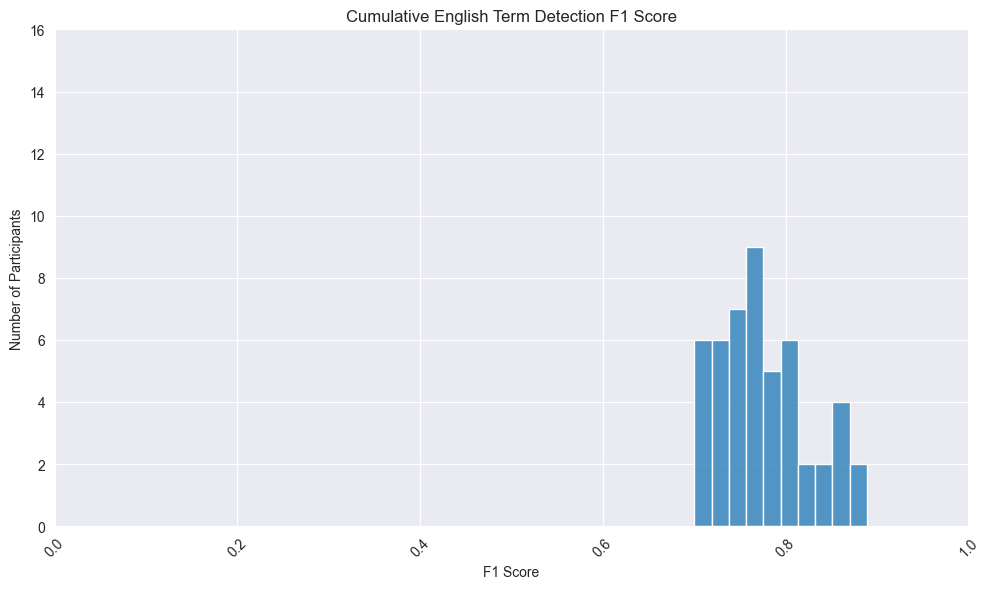

In [503]:
# plot cumulative_english_term_detection_f1_score as histogram
plt.figure(figsize=(10, 6))
sns.histplot(a['cumulative_english_term_detection_f1_score'], bins=10)

# make x-max 1.0 
plt.xlim(0, 1.0)
plt.ylim(0, 16)


plt.title('Cumulative English Term Detection F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [504]:
a.to_excel('annotators_with_f1_score_more_than_0.6.xlsx')

# value counts bölüm

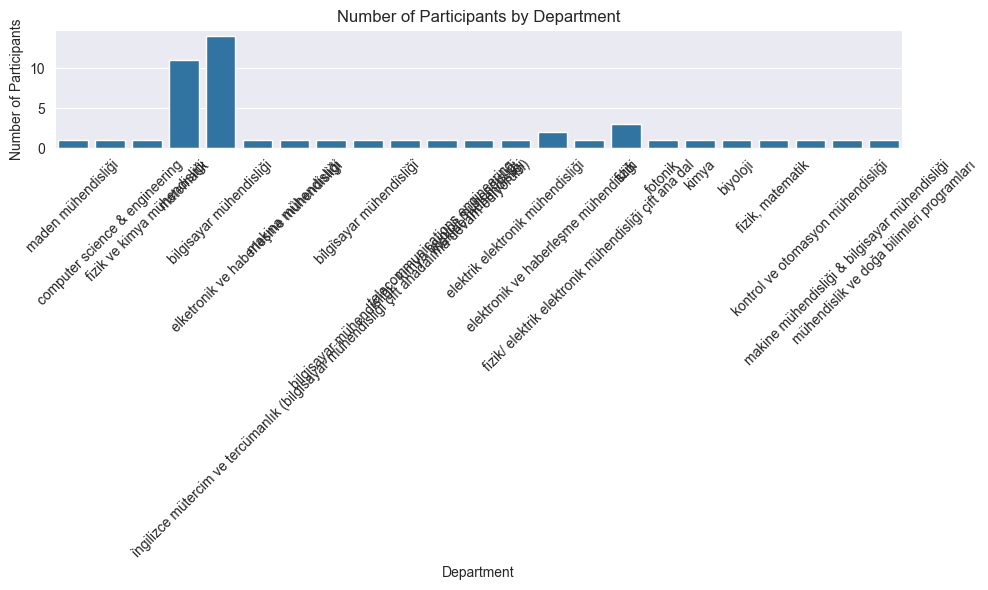

In [505]:
a.Bölüm.value_counts()

# make a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Bölüm', data=a)
plt.title('Number of Participants by Department')
plt.xlabel('Department')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# save the plot
